In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Read CSV to dataframe
car_df = pd.read_csv('CarPrice_Assignment.csv')

car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
#Observations in car dataframe.
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Data Preperation

We need to have only the car company so from the car name column we split the carname to two columns - CarCompany and CarModel

In [3]:
#Split the CarName column to CarCompany and CarModel and join them to car_df dataframe
car_df = car_df.join(car_df['CarName'].str.split(' ', 1, expand=True).rename(columns={0:'CarCompany', 1:'CarModel'}))
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [4]:
#Remove the starting and leading whitespaces for string objects

#Get the column names of string types
str_cols = car_df.select_dtypes(['object'])

#Strip the leading and trailing whitespaces if any
car_df[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [5]:
#Convert all string columns data to uppercase
car_df[str_cols.columns] = str_cols.apply(lambda x: x.str.upper())
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,ALFA-ROMERO GIULIA,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA
1,2,3,ALFA-ROMERO STELVIO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO
2,3,1,ALFA-ROMERO QUADRIFOGLIO,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO
3,4,2,AUDI 100 LS,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS
4,5,2,AUDI 100LS,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS


In [6]:
#Get the unique Car companies
car_df['CarCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [7]:
#Replace the improper company names with proper company names
car_df.loc[(car_df['CarCompany']=='MAXDA'),['CarCompany']] = 'MAZDA'
car_df.loc[(car_df['CarCompany']=='PORCSHCE'),['CarCompany']] = 'PORSCHE'
car_df.loc[(car_df['CarCompany']=='TOYOUTA'),['CarCompany']] = 'TOYOTA'
car_df.loc[((car_df['CarCompany']=='VOKSWAGEN') | (car_df['CarCompany']=='VW')),['CarCompany']] = 'VOLKSWAGEN'

In [8]:
#Get the unique Car companies again and verify if all the data is handled properly

car_df['CarCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [9]:
#Drop the CarName column
car_df=car_df.drop(['CarName'], axis=1)
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

### Univariate analysis

In [10]:
#Get the observations of symboling column

print(car_df['symboling'].unique())
print(car_df['symboling'].value_counts())
car_df['symboling'].describe()

[ 3  1  2  0 -1 -2]
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

There are no duplicate values and data is proper Only 3 cars are present with symboling rating of -2

In [11]:
#Get the observations of fueltype column


print(car_df['fueltype'].unique())
print(car_df['fueltype'].value_counts())
car_df['fueltype'].describe()

['GAS' 'DIESEL']
GAS       185
DIESEL     20
Name: fueltype, dtype: int64


count     205
unique      2
top       GAS
freq      185
Name: fueltype, dtype: object

Only two types are present Gas and Diesel. Gas is predominantly used

In [12]:
#Get the observations of aspiration column

print(car_df['aspiration'].unique())
print(car_df['aspiration'].value_counts())
car_df['aspiration'].describe()

['STD' 'TURBO']
STD      168
TURBO     37
Name: aspiration, dtype: int64


count     205
unique      2
top       STD
freq      168
Name: aspiration, dtype: object

Only two types are present. STD and TURBO

In [13]:
#Get the observations of doornumber column

print(car_df['doornumber'].unique())
print(car_df['doornumber'].value_counts())
car_df['doornumber'].describe()

['TWO' 'FOUR']
FOUR    115
TWO      90
Name: doornumber, dtype: int64


count      205
unique       2
top       FOUR
freq       115
Name: doornumber, dtype: object

In [14]:
#Get the observations of carbody column

print(car_df['carbody'].unique())
print(car_df['carbody'].value_counts())
car_df['carbody'].describe()

['CONVERTIBLE' 'HATCHBACK' 'SEDAN' 'WAGON' 'HARDTOP']
SEDAN          96
HATCHBACK      70
WAGON          25
HARDTOP         8
CONVERTIBLE     6
Name: carbody, dtype: int64


count       205
unique        5
top       SEDAN
freq         96
Name: carbody, dtype: object

In [15]:
#Get the observations of drivewheel column

print(car_df['drivewheel'].unique())
print(car_df['drivewheel'].value_counts())
car_df['drivewheel'].describe()

['RWD' 'FWD' '4WD']
FWD    120
RWD     76
4WD      9
Name: drivewheel, dtype: int64


count     205
unique      3
top       FWD
freq      120
Name: drivewheel, dtype: object

Three drive types ar epresent. Forward Wheel Drive, Rear Wheel Drive and Four wheel drive

In [16]:
#Get the observations of enginelocation column

print(car_df['enginelocation'].unique())
print(car_df['enginelocation'].value_counts())
car_df['enginelocation'].describe()

['FRONT' 'REAR']
FRONT    202
REAR       3
Name: enginelocation, dtype: int64


count       205
unique        2
top       FRONT
freq        202
Name: enginelocation, dtype: object

Only three cars are present with rear engine

In [17]:
#Get the observations of enginetype column

print(car_df['enginetype'].unique())
print(car_df['enginetype'].value_counts())
car_df['enginetype'].describe()

['DOHC' 'OHCV' 'OHC' 'L' 'ROTOR' 'OHCF' 'DOHCV']
OHC      148
OHCF      15
OHCV      13
DOHC      12
L         12
ROTOR      4
DOHCV      1
Name: enginetype, dtype: int64


count     205
unique      7
top       OHC
freq      148
Name: enginetype, dtype: object

In [18]:
#Get the observations of cylindernumber column

print(car_df['cylindernumber'].unique())
print(car_df['cylindernumber'].value_counts())
car_df['cylindernumber'].describe()

['FOUR' 'SIX' 'FIVE' 'THREE' 'TWELVE' 'TWO' 'EIGHT']
FOUR      159
SIX        24
FIVE       11
EIGHT       5
TWO         4
THREE       1
TWELVE      1
Name: cylindernumber, dtype: int64


count      205
unique       7
top       FOUR
freq       159
Name: cylindernumber, dtype: object

Since more than two categories of no of cylinders present lets map the categorical data to numeric values. This reduces the no of dimensions to perform observations to get the proper model

In [19]:
#Map no of cylinders data to numeric values
car_df['cylindernumber'] = car_df['cylindernumber'].map({'FOUR': 4, 'SIX': 6, 'FIVE': 5, 'THREE':3, 'TWELVE':12, 'TWO':2, 'EIGHT':8})

In [20]:
#Get the observations of cylindernumber column again to see if values are properly mapped

print(car_df['cylindernumber'].unique())
print(car_df['cylindernumber'].value_counts())
car_df['cylindernumber'].describe()

[ 4  6  5  3 12  2  8]
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


count    205.000000
mean       4.380488
std        1.080854
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max       12.000000
Name: cylindernumber, dtype: float64

In [21]:
#Get the observations of fuelsystem column

print(car_df['fuelsystem'].unique())
print(car_df['fuelsystem'].value_counts())
car_df['fuelsystem'].describe()

['MPFI' '2BBL' 'MFI' '1BBL' 'SPFI' '4BBL' 'IDI' 'SPDI']
MPFI    94
2BBL    66
IDI     20
1BBL    11
SPDI     9
4BBL     3
MFI      1
SPFI     1
Name: fuelsystem, dtype: int64


count      205
unique       8
top       MPFI
freq        94
Name: fuelsystem, dtype: object

#Lets observe the observations on dependent variable 'price' column using a box plot
sns.boxplot(x=car_df['price'])

Majority the prices ranges from 10000 to 17000. There are few cars with prices greater than 30000 These could be luxury/ high performance cars

### BI Variate analysis using pair plots

#### Pair plots with dependent variable (price) and  numerical independent variables

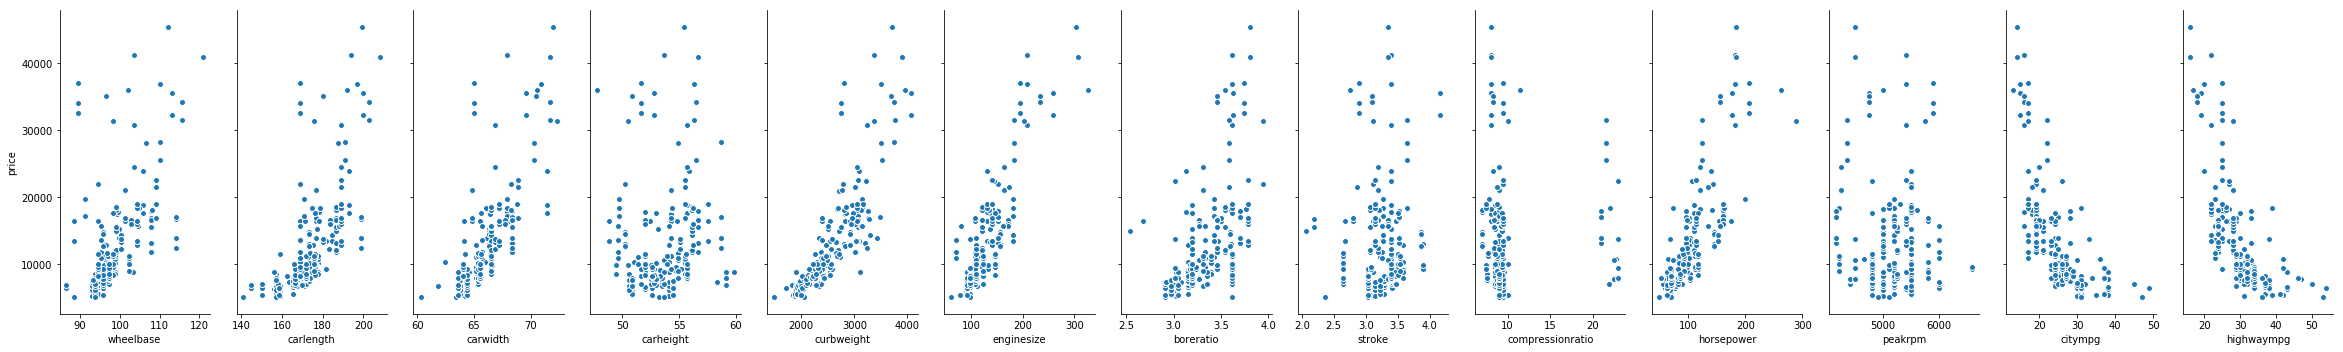

In [22]:
#Pair plots with numerical columns
sns.pairplot(car_df, x_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower',
'peakrpm',           
'citympg',             
'highwaympg'], y_vars='price', size=5, aspect=0.5,kind='scatter')

Most of the columns except peakrpm, compressionratio follow linear approach.
However carheight, stroke may be linear but are heavily skewed

### Pair plots with dependent variable (price) with independent categorical values

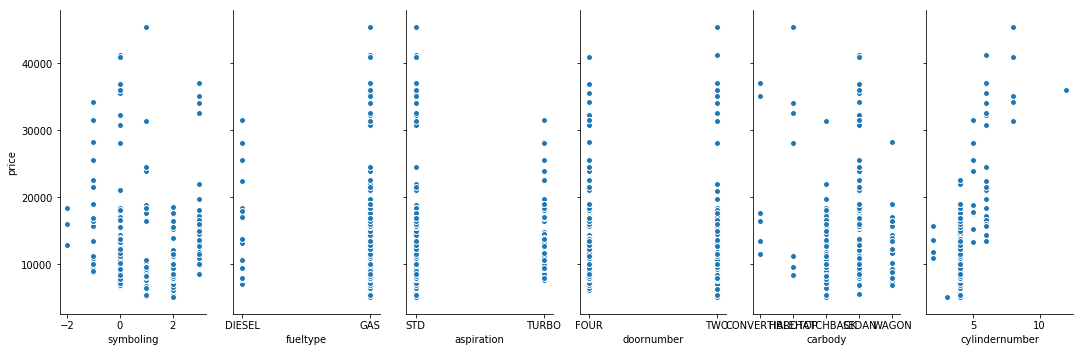

In [23]:
#Pair plots with categorical columns
sns.pairplot(car_df, x_vars=['symboling','fueltype','aspiration','doornumber','carbody','cylindernumber'], y_vars='price', size=5, aspect=0.5,kind='scatter')

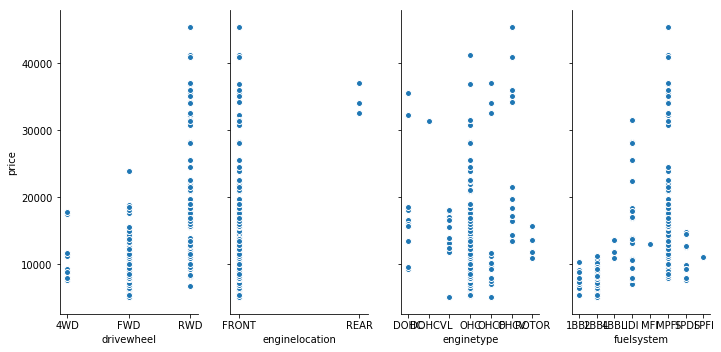

In [24]:
,
sns.pairplot(car_df, x_vars=['drivewheel','enginelocation','enginetype','fuelsystem'], y_vars='price', size=5, aspect=0.5,kind='scatter')

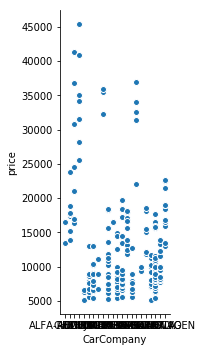

In [25]:
sns.pairplot(car_df, x_vars=['CarCompany'], y_vars='price', size=5, aspect=0.5,kind='scatter')

The price varies significantly for most of the columns from low to hight regardless of the category. THis could probably mean the most significant factors that drive the price could be numeric variables

## Derived metrics


In [26]:
#Lets create area of the car with carlength and carwidth 
car_df['area_car'] = car_df['carlength'] * car_df['carwidth']

In [27]:
#Create volume of the car with carlength, carwidth, carheight
car_df['volume_car'] = car_df['carlength'] * car_df['carwidth'] * car_df['carheight']

In [28]:
#Create curweight to car volume ratio
car_df['weight_to_volume_ratio'] = car_df['curbweight'] / car_df['volume_car']

In [29]:
#Create enzine size to power ratio

car_df['engsize_to_power_ratio'] = car_df['horsepower'] / car_df['enginesize']

In [30]:
#Create average milage metric which is average of city and highway mileage

car_df['avg_milage'] = (car_df['citympg']+car_df['highwaympg'])/2

In [31]:
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,citympg,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume_ratio,engsize_to_power_ratio,avg_milage
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,21,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,21,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,24,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,18,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0


### Multivariate analysis using heatmap with numerical columns

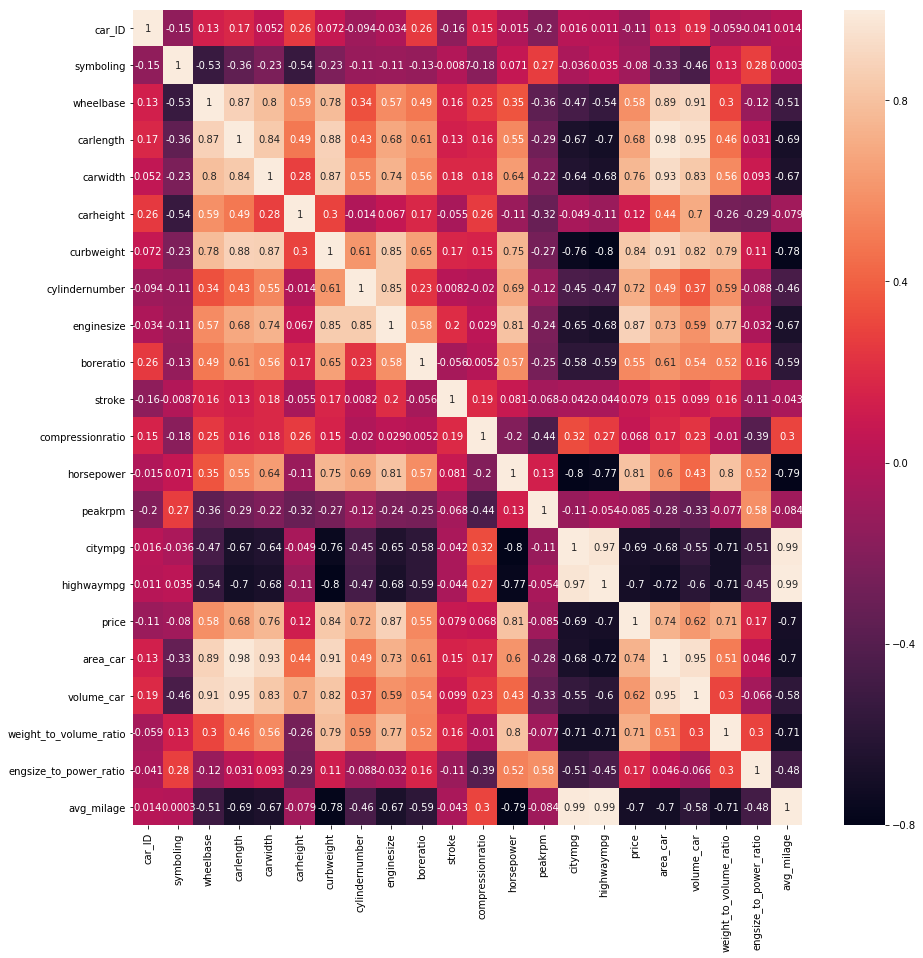

In [32]:
#Create figure size to plot the heatmap
plt.figure(figsize = (15,15))

sns.heatmap(car_df.corr(),annot = True)

milage colums (avg_milage, citympg, highwaympg are significantly correlated with most of the columns

In turn the dimenssions of the car(carlength, carwidth, carheight) are highly correlated with the weights of the car(enzinesize, curbweight)

The larger the car volume the more material it has so the weight increases. Its also interesting to note that the horsepower, boreratio column is highly correlated to weight coumns of the car.

The more the weight the more horsepower is required to power the vehicle

stroke is not highly correlated with any of the columns but compressionratio and peakrpm are slightly correlated

This covers all the numeric column and it could be that the volume_car and engine_to_powerratio columns may play significant role in determining the price of the car

### Dummy variables

In [33]:
#Convert the symboling column to dummies
symboling = pd.get_dummies(car_df['symboling'],drop_first=True,prefix='symboling')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,symboling],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,area_car,volume_car,weight_to_volume_ratio,engsize_to_power_ratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0


In [34]:
#Convert the fueltype column to dummies
fueltype = pd.get_dummies(car_df['fueltype'],drop_first=True,prefix='fueltype')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,fueltype],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,volume_car,weight_to_volume_ratio,engsize_to_power_ratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_GAS
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,1
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,1
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,1
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,1
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,1


In [35]:
#Convert the fueltype column to dummies
aspiration = pd.get_dummies(car_df['aspiration'],drop_first=True,prefix='aspiration')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,aspiration],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,weight_to_volume_ratio,engsize_to_power_ratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_GAS,aspiration_TURBO
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0.004826,0.853846,24.0,0,0,0,0,1,1,0
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0.004826,0.853846,24.0,0,0,0,0,1,1,0
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,0.004804,1.013158,22.5,0,0,1,0,0,1,0
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,0.003681,0.935780,27.0,0,0,0,1,0,1,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,0.004435,0.845588,20.0,0,0,0,1,0,1,0


In [36]:
#Convert the doornumber column to dummies
doornumber = pd.get_dummies(car_df['doornumber'],drop_first=True,prefix='doornumber')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,doornumber],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,engsize_to_power_ratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_GAS,aspiration_TURBO,doornumber_TWO
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0.853846,24.0,0,0,0,0,1,1,0,1
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0.853846,24.0,0,0,0,0,1,1,0,1
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,1.013158,22.5,0,0,1,0,0,1,0,1
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,0.935780,27.0,0,0,0,1,0,1,0,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,0.845588,20.0,0,0,0,1,0,1,0,0


In [37]:
#Convert the carbody column to dummies
carbody = pd.get_dummies(car_df['carbody'],drop_first=True,prefix='carbody')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,carbody],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,symboling_1,symboling_2,symboling_3,fueltype_GAS,aspiration_TURBO,doornumber_TWO,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0,0,1,1,0,1,0,0,0,0
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0,0,1,1,0,1,0,0,0,0
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,1,0,0,1,0,1,0,1,0,0
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,0,1,0,1,0,0,0,0,1,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,0,1,0,1,0,0,0,0,1,0


In [38]:
#Convert the drivewheel column to dummies
drivewheel = pd.get_dummies(car_df['drivewheel'],drop_first=True,prefix='drivewheel')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,drivewheel],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,symboling_3,fueltype_GAS,aspiration_TURBO,doornumber_TWO,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,1,1,0,1,0,0,0,0,0,1
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,1,1,0,1,0,0,0,0,0,1
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,0,1,0,1,0,1,0,0,0,1
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,0,1,0,0,0,0,1,0,1,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0


In [39]:
#Convert the enginelocation column to dummies
enginelocation = pd.get_dummies(car_df['enginelocation'],drop_first=True,prefix='enginelocation')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,enginelocation],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fueltype_GAS,aspiration_TURBO,doornumber_TWO,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginelocation_REAR
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,1,0,1,0,0,0,0,0,1,0
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,1,0,1,0,0,0,0,0,1,0
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,1,0,1,0,1,0,0,0,1,0
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,1,0,0,0,0,1,0,1,0,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,1,0,0,0,0,1,0,0,0,0


In [40]:
#Convert the enginetype column to dummies
enginetype = pd.get_dummies(car_df['enginetype'],drop_first=True,prefix='enginetype')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,enginetype],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginelocation_REAR,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0,0,1,0,0,0,0,0,0,0
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0,0,1,0,0,0,0,0,0,0
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,0,0,1,0,0,0,0,0,1,0
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,0,0,0,0,0,0,1,0,0,0


In [41]:
#Convert the fuelsystem column to dummies
fuelsystem = pd.get_dummies(car_df['fuelsystem'],drop_first=True,prefix='fuelsystem')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,fuelsystem],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,0,1,0,0,0,0,0,1,0,0
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [42]:
#Convert the CarCompany column to dummies
CarCompany = pd.get_dummies(car_df['CarCompany'],drop_first=True,prefix='CarCompany')
#Adding the results to the master dataframe
car_df = pd.concat([car_df,CarCompany],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Remove the original and insignificant columns
car_df = car_df.drop(['car_ID','symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','CarCompany','CarModel'],axis=1)
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
cylindernumber            205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
area_car                  205 non-null float64
volume_car                205 non-null float64
weight_to_volume_ratio    205 non-null float64
engsize_to_power_ratio    205 non-null float64
avg_milage      

### Model Building

In [44]:
#defining a mean normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalization to all columns 
car_df = car_df.apply(normalize)
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,-0.038049,0.011671,0.100174,-0.274007,-0.071409,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
1,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,-0.038049,0.011671,0.100174,-0.274007,-0.071409,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
2,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.161951,0.094689,-0.464111,0.102184,-0.071409,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
3,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.038049,-0.067575,-0.099826,0.068850,-0.008909,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
4,0.018758,0.038071,0.041016,0.047927,0.104125,0.061951,0.034312,-0.099826,0.068850,-0.133909,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659


In [45]:
#Get the feature columns - independent variables from the dataframe
features = car_df.columns.tolist()
features.remove('price')
features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'area_car',
 'volume_car',
 'weight_to_volume_ratio',
 'engsize_to_power_ratio',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'fueltype_GAS',
 'aspiration_TURBO',
 'doornumber_TWO',
 'carbody_HARDTOP',
 'carbody_HATCHBACK',
 'carbody_SEDAN',
 'carbody_WAGON',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginelocation_REAR',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BMW',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_JAGU

In [46]:
# Putting feature variables(independent variables) to X
X = car_df[features]

# Putting response variable(dependent variable) to y|
y = car_df['price']

In [47]:
#Importing sklearn libraries to split the test and train data
#Using 70 30 split with seed as 100 for this model
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
import statsmodels.api as sm                        # Importing statsmodels
X_train = sm.add_constant(X_train)              # Adding a constant variable
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = sm.OLS(y_train,X_train).fit() 
#Let's see the summary of our linear model
lm.summary()

c:\python3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     50.70
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.64e-45
Time:                        22:43:28   Log-Likelihood:                 296.51
No. Observations:                 143   AIC:                            -467.0
Df Residuals:                      80   BIC:                            -280.4
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheelbase                  0.0428      0.127      0.337      0.737      -0.210       0.296
carlength                 -4.3566      1.536     -2.836      0.006      -7.414      -1.299
carwidth                  -1.8432      0.776     -2.377      0.020      -3.386      -0.300
carheight                  0.5607      0.403      1.390      0.169      -0.242       1.364
curbweight                 1.2609      0.836      1.508      0.136      -0.403       2.925
cylindernumber            -0.4530      0.329     -1.378      0.172      -1.107       0.201
enginesize                 0.8790      0.668      1.316      0.192      -0.450       2.208
boreratio                 -0.2492      0.136     -1.835      0.070      -0.519       0.021
stroke                    -0.0456      0.093     -0.490      0.626      -0.231       0.140
compressionratio          -0.2271      0.240     -0.947      0.346      -0.704       0.250
horsepower                -0.0322      0.508     -0.063      0.950      -1.043       0.979
peakrpm                    0.1242      0.054      2.300      0.024       0.017       0.232
citympg                   -0.0185      0.151     -0.123      0.903      -0.318       0.281
highwaympg                 0.0463      0.138      0.335      0.739      -0.229       0.322
area_car                   8.2634      2.946      2.805      0.006       2.401      14.126
volume_car                -2.8655      1.379     -2.077      0.041      -5.610      -0.121
weight_to_volume_ratio    -0.7024      0.568     -1.236      0.220      -1.833       0.428
engsize_to_power_ratio    -0.0526      0.359     -0.147      0.884      -0.766       0.661
avg_milage                 0.0150      0.030      0.501      0.618      -0.045       0.075
symboling_-1               0.0472      0.045      1.048      0.298      -0.042       0.137
symboling_0                0.0459      0.054      0.846      0.400      -0.062       0.154
symboling_1                0.0268      0.056      0.483      0.631      -0.084       0.137
symboling_2                0.0394      0.054      0.736      0.464      -0.067       0.146
symboling_3                0.0136      0.055      0.246      0.806      -0.096       0.123
fueltype_GAS              -0.1022      0.105     -0.978      0.331      -0.310       0.106
aspiration_TURBO           0.0535      0.030      1.802      0.075      -0.006       0.113
doornumber_TWO            -0.0048      0.014     -0.340      0.735      -0.033       0.023
carbody_HARDTOP           -0.1200      0.058     -2.056      0.043      -0.236      -0.004
carbody_HATCHBACK         -0.1162      0.045     -2.607      0.011      -0.205      -0.027
carbody_SEDAN             -0.0936      0.047     -1.989      0.050      -0.187    6.99e-05
carbody_WAGON             -0.0715      0.050     -1.434      0.155      -0.171  

The model is having high r squared and adjusted r square values. Probably this could be due to the high number of columns in correlation. Let's calculate variation inflation factor and check if it is indeed the case

In [49]:
 # UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [50]:
# Calculating Vif value
vif_cal(input_data=car_df, dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
24,fueltype_GAS,inf
42,fuelsystem_IDI,inf
13,highwaympg,inf
33,enginelocation_REAR,inf
12,citympg,inf
37,enginetype_OHCF,inf
64,CarCompany_SUBARU,inf
18,avg_milage,inf
14,area_car,2.380839e+04
15,volume_car,6.558080e+03


As expected many columns are having high vif

### Feature reduction with RFE

Since there are many columns lets reduce the features of the model using rfe to atleast 25 columns
We do the reductions in increments of 5 and check the r-square and adjusted r square values to make sure they are not reduced significantly

In [51]:
#Importing RFE packages

from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 65
lm = LinearRegression()
rfe = RFE(lm, 65)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 1 1 2 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1]


['fuelsystem_MFI', 'fuelsystem_SPFI', 'CarCompany_MERCURY']

In [52]:
#Drop the columns from the features and create new dataframe X_train_1
X_train_1 = X_train.drop(dropColumns , 1)
# Adding a constant variable
X_train_1 = sm.add_constant(X_train_1)
#Create linear regression model lm_1 with the new training data
lm_1 = sm.OLS(y_train,X_train_1).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     50.70
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.64e-45
Time:                        22:43:29   Log-Likelihood:                 296.51
No. Observations:                 143   AIC:                            -467.0
Df Residuals:                      80   BIC:                            -280.4
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [53]:
# Calculating Vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
12,citympg,inf
33,enginelocation_REAR,inf
37,enginetype_OHCF,inf
24,fueltype_GAS,inf
42,fuelsystem_IDI,inf
18,avg_milage,inf
61,CarCompany_SUBARU,inf
13,highwaympg,inf
14,area_car,2.251888e+04
15,volume_car,6.476960e+03


In [54]:
# Running RFE with the output number of the variable equal to 65
lm = LinearRegression()
rfe = RFE(lm, 60)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True False  True  True False  True
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 5 1 1 1 1 1 6 1 1 1 1
 1 2 1 1 1 1 8 1 1 7 1 1 3 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1]


['symboling_3',
 'doornumber_TWO',
 'drivewheel_RWD',
 'enginetype_OHCV',
 'fuelsystem_MFI',
 'fuelsystem_SPFI',
 'CarCompany_BUICK',
 'CarCompany_MERCURY']

In [55]:
# creating X_traint_4 dataframe by dropping variables from X_test
X_train_4 = X_train.drop(dropColumns, 1)

# Adding a constant variable
X_train_4 = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train,X_train_4).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     58.38
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           8.07e-50
Time:                        22:43:29   Log-Likelihood:                 296.26
No. Observations:                 143   AIC:                            -476.5
Df Residuals:                      85   BIC:                            -304.7
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [56]:
# Calculating Vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
30,enginelocation_REAR,inf
23,fueltype_GAS,inf
18,avg_milage,inf
56,CarCompany_SUBARU,inf
13,highwaympg,inf
12,citympg,inf
38,fuelsystem_IDI,inf
34,enginetype_OHCF,inf
14,area_car,2.175051e+04
15,volume_car,5.823300e+03


In [57]:
# Running RFE with the output number of the variable equal to 55
lm = LinearRegression()
rfe = RFE(lm, 55)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 
#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True False  True False
  True  True False  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True False  True  True False  True
  True False  True  True  True  True  True False False  True  True False
  True  True  True  True  True  True  True  True]
[ 3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  1  1  5  1  9
  1  1 10  1  1  1  1  1 11  1  1  1  1  1  7  1  1  1  1 13  1  1 12  1
  1  8  1  1  1  1  1  2 14  1  1  4  1  1  1  1  1  1  1  1]


['wheelbase',
 'avg_milage',
 'symboling_1',
 'symboling_3',
 'doornumber_TWO',
 'drivewheel_RWD',
 'enginetype_OHCV',
 'fuelsystem_MFI',
 'fuelsystem_SPFI',
 'CarCompany_BUICK',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT']

In [58]:
# creating X_train_5 dataframe by dropping variables from X_test
X_train_5 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_5 = sm.add_constant(X_train_5)
lm_5 = sm.OLS(y_train,X_train_5).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     65.12
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.96e-53
Time:                        22:43:30   Log-Likelihood:                 295.60
No. Observations:                 143   AIC:                            -483.2
Df Residuals:                      89   BIC:                            -323.2
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [59]:
# Calculating Vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
27,enginelocation_REAR,inf
51,CarCompany_SUBARU,inf
35,fuelsystem_IDI,inf
31,enginetype_OHCF,inf
20,fueltype_GAS,inf
13,area_car,1.243580e+04
14,volume_car,4.276440e+03
0,carlength,3.269350e+03
3,curbweight,1.106120e+03
1,carwidth,7.707200e+02


In [60]:
# Running RFE with the output number of the variable equal to 65
lm = LinearRegression()
rfe = RFE(lm, 50)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)
#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True False  True False
  True  True False  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True False False False False False
  True False  True  True  True  True  True False False  True  True False
  True  True  True  True  True False False  True]
[ 8  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 11  1  1 10  1 14
  1  1 15  1  1  1  1  1 16  1  1  1  1  1 12  1  1  1  1 18  4  3 17  6
  1 13  1  1  1  1  1  7 19  1  1  9  1  1  1  1  1  2  5  1]


['wheelbase',
 'avg_milage',
 'symboling_1',
 'symboling_3',
 'doornumber_TWO',
 'drivewheel_RWD',
 'enginetype_OHCV',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_PEUGEOT',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN']

In [61]:
# creating X_train_6 dataframe by dropping variables from X_test
X_train_6 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_6 = sm.add_constant(X_train_6)
lm_6 = sm.OLS(y_train,X_train_6).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     75.04
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.14e-57
Time:                        22:43:31   Log-Likelihood:                 294.76
No. Observations:                 143   AIC:                            -491.5
Df Residuals:                      94   BIC:                            -346.3
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [62]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
20,fueltype_GAS,inf
48,CarCompany_SUBARU,inf
35,fuelsystem_IDI,inf
27,enginelocation_REAR,inf
31,enginetype_OHCF,inf
13,area_car,1.110891e+04
14,volume_car,4.026940e+03
0,carlength,2.978000e+03
3,curbweight,1.039670e+03
1,carwidth,6.917700e+02


In [63]:
# Running RFE with the output number of the variable equal to 45
lm = LinearRegression()
rfe = RFE(lm, 45)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)
#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
  True  True False  True  True  True  True  True False  True  True False
  True  True False  True False  True  True False False False False False
  True False  True  True  True  True  True False False  True False False
  True  True  True  True  True False False  True]
[13  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 16  1  2 15  3 19
  1  1 20  1  1  1  1  1 21  1  1  6  1  1 17  1  4  1  1 23  9  8 22 11
  1 18  1  1  1  1  1 12 24  1  5 14  1  1  1  1  1  7 10  1]


['wheelbase',
 'avg_milage',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'doornumber_TWO',
 'drivewheel_RWD',
 'enginetype_L',
 'enginetype_OHCV',
 'fuelsystem_2BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN']

In [64]:
# creating X_test_6 dataframe by dropping variables from X_test
X_train_7 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_7 = sm.add_constant(X_train_7)
lm_7 = sm.OLS(y_train,X_train_7).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     83.21
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.84e-61
Time:                        22:43:31   Log-Likelihood:                 290.70
No. Observations:                 143   AIC:                            -493.4
Df Residuals:                      99   BIC:                            -363.0
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [65]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
18,fueltype_GAS,inf
31,fuelsystem_IDI,inf
25,enginelocation_REAR,inf
28,enginetype_OHCF,inf
43,CarCompany_SUBARU,inf
13,area_car,1.048458e+04
14,volume_car,3.739260e+03
0,carlength,2.780290e+03
3,curbweight,8.353600e+02
1,carwidth,6.585800e+02


In [66]:
# Running RFE with the output number of the variable equal to 40
lm = LinearRegression()
rfe = RFE(lm, 40)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)
#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
  True False False  True  True  True  True False False  True  True False
  True  True False  True False False  True False False False False False
  True False  True  True  True False  True False False  True False False
  True  True  True  True  True False False  True]
[18  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 21  4  7 20  8 24
  1  3 25  1  1  1  1  5 26  1  1 11  1  1 22  1  9  2  1 28 14 13 27 16
  1 23  1  1  1  6  1 17 29  1 10 19  1  1  1  1  1 12 15  1]


['wheelbase',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_L',
 'enginetype_OHCV',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN']

In [67]:
# creating X_test_6 dataframe by dropping variables from X_test
X_train_8 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_8 = sm.add_constant(X_train_8)
lm_8 = sm.OLS(y_train,X_train_8).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     91.03
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.13e-64
Time:                        22:43:32   Log-Likelihood:                 284.92
No. Observations:                 143   AIC:                            -491.8
Df Residuals:                     104   BIC:                            -376.3
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [68]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
22,enginelocation_REAR,inf
27,fuelsystem_IDI,inf
17,fueltype_GAS,inf
25,enginetype_OHCF,inf
38,CarCompany_SUBARU,inf
13,area_car,1.018332e+04
14,volume_car,3.649550e+03
0,carlength,2.636570e+03
3,curbweight,7.999400e+02
1,carwidth,6.254900e+02


In [69]:
# Running RFE with the output number of the variable equal to 35
lm = LinearRegression()
rfe = RFE(lm, 35)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)
#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[False  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True False False False False False False
  True False False  True  True  True  True False False  True  True False
  True  True False False False False  True False False False False False
  True False False  True False False  True False False  True False False
  True  True False  True  True False False  True]
[23  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1  1 26  9 12 25 13 29
  1  8 30  1  1  1  1 10 31  1  1 16  1  1 27  6 14  7  1 33 19 18 32 21
  1 28  3  1  5 11  1 22 34  1 15 24  1  1  2  1  1 17 20  1]


['wheelbase',
 'peakrpm',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_L',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_RENAULT',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN']

In [70]:
# creating X_test_9 dataframe by dropping variables from X_test
X_train_9 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_9 = sm.add_constant(X_train_9)
lm_9 = sm.OLS(y_train,X_train_9).fit()      # Running the linear model
#Let's see the summary of our linear model

#Calculate vif valueprint(lm_9.summary())

In [71]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
33,CarCompany_SUBARU,inf
25,fuelsystem_IDI,inf
24,enginetype_OHCF,inf
21,enginelocation_REAR,inf
16,fueltype_GAS,inf
12,area_car,9048.440000
13,volume_car,3329.330000
0,carlength,2343.150000
3,curbweight,794.490000
1,carwidth,561.180000


In [72]:
# Running RFE with the output number of the variable equal to 35
lm = LinearRegression()
rfe = RFE(lm, 30)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[False  True  True  True  True  True  True  True  True  True  True False
 False False  True  True  True  True False False False False False False
  True False False  True  True  True  True False False  True  True False
 False  True False False False False  True False False False False False
  True False False False False False  True False False  True False False
 False  True False  True  True False False  True]
[28  1  1  1  1  1  1  1  1  1  1  9  3  5  1  1  1  1 31 14 17 30 18 34
  1 13 35  1  1  1  1 15 36  1  1 21  2  1 32 11 19 12  1 38 24 23 37 26
  1 33  8  4 10 16  1 27 39  1 20 29  6  1  7  1  1 22 25  1]


['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN']

In [73]:
# creating X_test_10 dataframe by dropping variables from X_test
X_train_10 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_10 = sm.add_constant(X_train_10)
lm_10 = sm.OLS(y_train,X_train_10).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           5.45e-68
Time:                        22:43:33   Log-Likelihood:                 265.39
No. Observations:                 143   AIC:                            -472.8
Df Residuals:                     114   BIC:                            -386.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [74]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

c:\python3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
28,CarCompany_SUBARU,inf
22,fuelsystem_IDI,inf
21,enginetype_OHCF,inf
19,enginelocation_REAR,inf
14,fueltype_GAS,inf
10,area_car,8802.720000
11,volume_car,2922.920000
0,carlength,2297.580000
3,curbweight,698.080000
1,carwidth,552.760000


In [75]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
rfe = RFE(lm, 25)                   # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)
#Get the columns to drop in list
dropColumns = X_train.columns[~rfe.support_].tolist()
dropColumns

[False  True  True  True  True  True  True  True  True  True  True False
 False False  True  True  True  True False False False False False False
  True False False  True  True  True  True False False  True False False
 False False False False False False False False False False False False
  True False False False False False  True False False False False False
 False  True False  True False False False  True]
[33  1  1  1  1  1  1  1  1  1  1 14  8 10  1  1  1  1 36 19 22 35 23 39
  1 18 40  1  1  1  1 20 41  1  5 26  7  2 37 16 24 17  4 43 29 28 42 31
  1 38 13  9 15 21  1 32 44  6 25 34 11  1 12  1  3 27 30  1]


['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN']

In [76]:
# creating X_test_10 dataframe by dropping variables from X_test
X_train_11 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_11 = sm.add_constant(X_train_11)
lm_11 = sm.OLS(y_train,X_train_11).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           5.66e-69
Time:                        22:43:33   Log-Likelihood:                 259.42
No. Observations:                 143   AIC:                            -466.8
Df Residuals:                     117   BIC:                            -389.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [77]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
10,area_car,8800.38
11,volume_car,2866.82
0,carlength,2293.42
3,curbweight,676.59
1,carwidth,550.44
2,carheight,273.08
12,weight_to_volume_ratio,242.62
14,fueltype_GAS,69.29
8,compressionratio,65.50
9,horsepower,50.98


Now since we left with 25 columns, lets eliminate the insignificant features manually
Lets estimatate the p-value > 0.001 to be insiginificant to eliminiate the features

Still many columns are having high vif and high p values.

First lets consider te columns with high vif and high p-values to eliminiate

In [78]:
#Since the p-value of compressionratio is significantly greater than 0.001 and is having high variance lets drop it
#and re caculate the model
dropColumns.append('compressionratio')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio']

In [79]:
# creating X_test_10 dataframe by dropping variables from X_test
X_train_12 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_12 = sm.add_constant(X_train_12)
lm_12 = sm.OLS(y_train,X_train_12).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           9.18e-70
Time:                        22:43:33   Log-Likelihood:                 258.74
No. Observations:                 143   AIC:                            -467.5
Df Residuals:                     118   BIC:                            -393.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [80]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
9,area_car,8796.01
10,volume_car,2826.35
0,carlength,2271.73
3,curbweight,673.64
1,carwidth,546.66
2,carheight,271.01
11,weight_to_volume_ratio,240.11
8,horsepower,48.56
5,enginesize,45.41
4,cylindernumber,15.71


In [81]:
#Since the p-value of horsepower is greater than 0.001 and is having high variance lets drop it
#and re caculate the model
dropColumns.append('horsepower')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower']

In [82]:
# creating X_test_13 dataframe by dropping variables from X_test
X_train_13 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_13 = sm.add_constant(X_train_13)
lm_13 = sm.OLS(y_train,X_train_13).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     115.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.35e-70
Time:                        22:43:33   Log-Likelihood:                 257.49
No. Observations:                 143   AIC:                            -467.0
Df Residuals:                     119   BIC:                            -395.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [83]:

#Get the columns to drop in list
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
8,area_car,8702.33
9,volume_car,2826.18
0,carlength,2222.73
3,curbweight,671.43
1,carwidth,535.63
2,carheight,270.80
10,weight_to_volume_ratio,238.18
5,enginesize,32.32
15,carbody_SEDAN,13.05
4,cylindernumber,12.93


In [84]:
#Since the p-value of CarCompany_JAGUAR is greater than 0.001 lets drop it
dropColumns.append('CarCompany_JAGUAR')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR']

In [85]:
# creating X_test_13 dataframe by dropping variables from X_test
X_train_14 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_14 = sm.add_constant(X_train_14)
lm_14 = sm.OLS(y_train,X_train_14).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     118.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           9.38e-71
Time:                        22:43:34   Log-Likelihood:                 255.69
No. Observations:                 143   AIC:                            -465.4
Df Residuals:                     120   BIC:                            -397.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [86]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
8,area_car,7508.00
0,carlength,2131.60
9,volume_car,1800.83
3,curbweight,575.73
1,carwidth,513.56
10,weight_to_volume_ratio,209.00
2,carheight,198.59
5,enginesize,32.01
15,carbody_SEDAN,12.61
4,cylindernumber,12.47


In [87]:
#Drop the carbody_HARDTOP column which is having p-value greater than 0.01
dropColumns.append('carbody_HARDTOP')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP']

In [88]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_15 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_15 = sm.add_constant(X_train_15)
lm_15 = sm.OLS(y_train,X_train_15).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     119.0
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.70e-70
Time:                        22:43:34   Log-Likelihood:                 252.09
No. Observations:                 143   AIC:                            -460.2
Df Residuals:                     121   BIC:                            -395.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [89]:
#Get the columns to drop in list
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
8,area_car,7497.04
0,carlength,2123.80
9,volume_car,1793.98
3,curbweight,565.17
1,carwidth,512.04
10,weight_to_volume_ratio,202.35
2,carheight,198.58
5,enginesize,31.89
4,cylindernumber,12.47
14,carbody_SEDAN,6.68


In [90]:
#Drop carbody_WAGON column which is having high vif and p-value greater than 0.01
dropColumns.append('carbody_WAGON')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON']

In [91]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_16 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_16 = sm.add_constant(X_train_16)
lm_16 = sm.OLS(y_train,X_train_16).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     120.1
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.31e-70
Time:                        22:43:34   Log-Likelihood:                 248.85
No. Observations:                 143   AIC:                            -455.7
Df Residuals:                     122   BIC:                            -393.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [92]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
8,area_car,7476.05
0,carlength,2119.30
9,volume_car,1789.11
3,curbweight,559.64
1,carwidth,512.03
10,weight_to_volume_ratio,201.03
2,carheight,198.04
5,enginesize,29.07
4,cylindernumber,11.57
6,boreratio,4.85


In [93]:
#P-value of carbody_SEDAN column is greater than 0.01. Lets drop it
dropColumns.append('carbody_SEDAN')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN']

In [94]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_17 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_17 = sm.add_constant(X_train_17)
lm_17 = sm.OLS(y_train,X_train_17).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     124.0
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           9.81e-71
Time:                        22:43:34   Log-Likelihood:                 247.00
No. Observations:                 143   AIC:                            -454.0
Df Residuals:                     123   BIC:                            -394.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [95]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
8,area_car,7474.88
0,carlength,2117.15
9,volume_car,1758.95
3,curbweight,554.04
1,carwidth,511.04
2,carheight,197.32
10,weight_to_volume_ratio,196.87
5,enginesize,29.07
4,cylindernumber,11.56
6,boreratio,4.85


In [96]:
#curbweight is having high p-value and high vif. Lets drop it
dropColumns.append('curbweight')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight']

In [97]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_18 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_18 = sm.add_constant(X_train_18)
lm_18 = sm.OLS(y_train,X_train_18).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.76e-70
Time:                        22:43:34   Log-Likelihood:                 243.47
No. Observations:                 143   AIC:                            -448.9
Df Residuals:                     124   BIC:                            -392.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [98]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
7,area_car,6047.96
8,volume_car,1617.17
0,carlength,1489.68
1,carwidth,363.18
2,carheight,196.14
4,enginesize,28.15
3,cylindernumber,11.55
9,weight_to_volume_ratio,5.19
5,boreratio,4.84
15,CarCompany_PORSCHE,3.59


In [99]:
#Lets drop area_car which is having high vif
dropColumns.append('area_car')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car']

In [100]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_19 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_19 = sm.add_constant(X_train_19)
lm_19 = sm.OLS(y_train,X_train_19).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           7.98e-66
Time:                        22:43:35   Log-Likelihood:                 228.27
No. Observations:                 143   AIC:                            -420.5
Df Residuals:                     125   BIC:                            -367.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [101]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
7,volume_car,602.53
0,carlength,180.80
2,carheight,77.47
1,carwidth,57.24
4,enginesize,25.64
3,cylindernumber,11.55
8,weight_to_volume_ratio,5.02
5,boreratio,4.73
14,CarCompany_PORSCHE,3.56
12,enginelocation_REAR,3.27


In [102]:
#Drop carwidth which is having high vif and p-value
dropColumns.append('carwidth')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth']

In [103]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_20 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_20 = sm.add_constant(X_train_20)
lm_20 = sm.OLS(y_train,X_train_20).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     113.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.17e-66
Time:                        22:43:35   Log-Likelihood:                 227.74
No. Observations:                 143   AIC:                            -421.5
Df Residuals:                     126   BIC:                            -371.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [104]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
6,volume_car,67.62
0,carlength,42.59
3,enginesize,24.44
1,carheight,10.55
2,cylindernumber,10.29
7,weight_to_volume_ratio,4.96
4,boreratio,4.40
13,CarCompany_PORSCHE,3.41
11,enginelocation_REAR,3.08
8,engsize_to_power_ratio,2.37


In [105]:
#Drop the weight to volume ratio. It is having high vif and high p-value
dropColumns.append('weight_to_volume_ratio')

In [106]:
# creating X_test_15 dataframe by dropping variables from X_test
X_train_21 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_21 = sm.add_constant(X_train_21)
lm_21 = sm.OLS(y_train,X_train_21).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.15e-67
Time:                        22:43:35   Log-Likelihood:                 226.91
No. Observations:                 143   AIC:                            -421.8
Df Residuals:                     127   BIC:                            -374.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [107]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
6,volume_car,64.99
0,carlength,41.21
3,enginesize,19.14
1,carheight,10.55
2,cylindernumber,10.14
4,boreratio,4.40
12,CarCompany_PORSCHE,3.41
10,enginelocation_REAR,3.05
5,stroke,1.92
7,engsize_to_power_ratio,1.80


In [108]:
#Drop enginelocation_REAR which is having high p-value and high vif
dropColumns.append('enginelocation_REAR')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [109]:
# creating X_test_22 dataframe by dropping variables from X_test
X_train_22 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_22 = sm.add_constant(X_train_22)
lm_22 = sm.OLS(y_train,X_train_22).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     126.3
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.04e-67
Time:                        22:43:35   Log-Likelihood:                 224.97
No. Observations:                 143   AIC:                            -419.9
Df Residuals:                     128   BIC:                            -375.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [110]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
6,volume_car,59.95
0,carlength,39.42
3,enginesize,17.09
1,carheight,9.81
2,cylindernumber,9.47
4,boreratio,4.09
5,stroke,1.84
7,engsize_to_power_ratio,1.78
9,carbody_HATCHBACK,1.67
11,CarCompany_PORSCHE,1.53


In [111]:
#Drop CarCompany_SAAB which is having high p-value
dropColumns.append('CarCompany_SAAB')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [112]:
# creating X_test_23 dataframe by dropping variables from X_test
X_train_23 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_23 = sm.add_constant(X_train_23)
lm_23 = sm.OLS(y_train,X_train_23).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           7.26e-68
Time:                        22:43:35   Log-Likelihood:                 222.60
No. Observations:                 143   AIC:                            -417.2
Df Residuals:                     129   BIC:                            -375.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [113]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
6,volume_car,57.69
0,carlength,37.01
3,enginesize,16.95
2,cylindernumber,9.37
1,carheight,9.24
4,boreratio,3.99
5,stroke,1.73
7,engsize_to_power_ratio,1.70
9,carbody_HATCHBACK,1.60
11,CarCompany_PORSCHE,1.53


In [114]:
#Drop CarCompany_VOLVO whiich is having high p-value
dropColumns.append('CarCompany_VOLVO')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [115]:
# creating X_test_23 dataframe by dropping variables from X_test
X_train_24 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_24 = sm.add_constant(X_train_24)
lm_24 = sm.OLS(y_train,X_train_24).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           7.43e-68
Time:                        22:43:35   Log-Likelihood:                 219.80
No. Observations:                 143   AIC:                            -413.6
Df Residuals:                     130   BIC:                            -375.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [116]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
6,volume_car,57.32
0,carlength,36.94
3,enginesize,16.71
2,cylindernumber,9.31
1,carheight,9.24
4,boreratio,3.82
5,stroke,1.73
7,engsize_to_power_ratio,1.69
9,carbody_HATCHBACK,1.59
11,CarCompany_PORSCHE,1.52


Now no p-value is insiginificant. And the volume_car is showing igh vif. But since volume is derived from carlength, carheight lets drop the carheight which is also having high vif

In [117]:
#Drop carheigh column
dropColumns.append('carheight')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [118]:
# creating X_test_25 dataframe by dropping variables from X_test
X_train_25 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_25 = sm.add_constant(X_train_25)
lm_25 = sm.OLS(y_train,X_train_25).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           7.98e-63
Time:                        22:43:35   Log-Likelihood:                 204.29
No. Observations:                 143   AIC:                            -384.6
Df Residuals:                     131   BIC:                            -349.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [119]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
0,carlength,17.34
2,enginesize,16.34
5,volume_car,13.03
1,cylindernumber,9.24
3,boreratio,3.82
4,stroke,1.72
6,engsize_to_power_ratio,1.56
10,CarCompany_PORSCHE,1.52
8,carbody_HATCHBACK,1.44
7,fueltype_GAS,1.41


In [120]:
#Drpo the carbody_HATCHBACK which is having high p-value
dropColumns.append('carbody_HATCHBACK')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [121]:
# creating X_test_26 dataframe by dropping variables from X_test
X_train_26 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_26 = sm.add_constant(X_train_26)
lm_26 = sm.OLS(y_train,X_train_26).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.36e-63
Time:                        22:43:35   Log-Likelihood:                 203.52
No. Observations:                 143   AIC:                            -385.0
Df Residuals:                     132   BIC:                            -352.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [122]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
0,carlength,17.02
2,enginesize,15.83
5,volume_car,13.00
1,cylindernumber,9.09
3,boreratio,3.80
4,stroke,1.72
9,CarCompany_PORSCHE,1.50
6,engsize_to_power_ratio,1.47
7,fueltype_GAS,1.41
8,CarCompany_BMW,1.08


In [123]:
#Drop the carlength which is having high vif
dropColumns.append('carlength')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [124]:
# creating X_test_26 dataframe by dropping variables from X_test
X_train_27 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_27 = sm.add_constant(X_train_27)
lm_27 = sm.OLS(y_train,X_train_27).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.0
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           4.46e-64
Time:                        22:43:35   Log-Likelihood:                 202.00
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     133   BIC:                            -354.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [125]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,14.42
0,cylindernumber,8.93
2,boreratio,3.78
4,volume_car,2.17
3,stroke,1.72
8,CarCompany_PORSCHE,1.42
6,fueltype_GAS,1.41
5,engsize_to_power_ratio,1.32
7,CarCompany_BMW,1.07


In [126]:
#Drpo the boreratio which is having high vif
dropColumns.append('boreratio')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [127]:
# creating X_test_28 dataframe by dropping variables from X_test
X_train_28 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_28 = sm.add_constant(X_train_28)
lm_28 = sm.OLS(y_train,X_train_28).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.41e-58
Time:                        22:43:36   Log-Likelihood:                 185.65
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     134   BIC:                            -326.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [128]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,6.57
0,cylindernumber,4.57
3,volume_car,2.11
5,fueltype_GAS,1.41
2,stroke,1.33
4,engsize_to_power_ratio,1.32
7,CarCompany_PORSCHE,1.31
6,CarCompany_BMW,1.07


In [129]:
#Drop cylinder number which is having high vif and p-value
dropColumns.append('cylindernumber')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [130]:
# creating X_test_29 dataframe by dropping variables from X_test
X_train_29 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_29 = sm.add_constant(X_train_29)
lm_29 = sm.OLS(y_train,X_train_29).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     145.2
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.32e-59
Time:                        22:43:36   Log-Likelihood:                 185.48
No. Observations:                 143   AIC:                            -355.0
Df Residuals:                     135   BIC:                            -331.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [131]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
0,enginesize,2.02
2,volume_car,1.91
4,fueltype_GAS,1.41
6,CarCompany_PORSCHE,1.31
3,engsize_to_power_ratio,1.27
1,stroke,1.19
5,CarCompany_BMW,1.07


In [132]:
#Drop stroke column which is having high p-value and vif
dropColumns.append('stroke')
dropColumns

['wheelbase',
 'peakrpm',
 'citympg',
 'highwaympg',
 'avg_milage',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'aspiration_TURBO',
 'doornumber_TWO',
 'drivewheel_FWD',
 'drivewheel_RWD',
 'enginetype_DOHCV',
 'enginetype_L',
 'enginetype_OHC',
 'enginetype_OHCF',
 'enginetype_OHCV',
 'enginetype_ROTOR',
 'fuelsystem_2BBL',
 'fuelsystem_4BBL',
 'fuelsystem_IDI',
 'fuelsystem_MFI',
 'fuelsystem_MPFI',
 'fuelsystem_SPDI',
 'fuelsystem_SPFI',
 'CarCompany_AUDI',
 'CarCompany_BUICK',
 'CarCompany_CHEVROLET',
 'CarCompany_DODGE',
 'CarCompany_HONDA',
 'CarCompany_ISUZU',
 'CarCompany_MAZDA',
 'CarCompany_MERCURY',
 'CarCompany_MITSUBISHI',
 'CarCompany_NISSAN',
 'CarCompany_PEUGEOT',
 'CarCompany_PLYMOUTH',
 'CarCompany_RENAULT',
 'CarCompany_SUBARU',
 'CarCompany_TOYOTA',
 'CarCompany_VOLKSWAGEN',
 'compressionratio',
 'horsepower',
 'CarCompany_JAGUAR',
 'carbody_HARDTOP',
 'carbody_WAGON',
 'carbody_SEDAN',
 'curbweight',
 'area_car',
 'carwidth',
 

In [133]:
# creating X_test_30 dataframe by dropping variables from X_test
X_train_30 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_30 = sm.add_constant(X_train_30)
lm_30 = sm.OLS(y_train,X_train_30).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.46e-60
Time:                        22:43:36   Log-Likelihood:                 185.04
No. Observations:                 143   AIC:                            -356.1
Df Residuals:                     136   BIC:                            -335.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [134]:
#Get the columns to drop in list
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,volume_car,1.86
0,enginesize,1.85
3,fueltype_GAS,1.32
2,engsize_to_power_ratio,1.27
5,CarCompany_PORSCHE,1.24
4,CarCompany_BMW,1.06


Now the model is having feature with very low vif and very low p-value with a pretty high r-square value. Lets see if we add/change new variables if we get a better r-square with low vif

In [135]:
#Remove volume_car and add car_length column to see if there is any imporevment
dropColumns.append('volume_car')
dropColumns.remove('carlength')


In [136]:
# creating X_test_31 dataframe by dropping variables from X_test
X_train_31 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_31 = sm.add_constant(X_train_31)
lm_31 = sm.OLS(y_train,X_train_31).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           6.68e-59
Time:                        22:43:36   Log-Likelihood:                 181.00
No. Observations:                 143   AIC:                            -348.0
Df Residuals:                     136   BIC:                            -327.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

There is a little drop in r square value. Now lets add car_volume back and add horsepower instead of engine size



In [137]:
dropColumns.remove('volume_car')
dropColumns.append('carlength')
dropColumns.remove('horsepower')
dropColumns.append('enginesize')


In [138]:
# creating X_test_32 dataframe by dropping variables from X_test
X_train_32 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_32 = sm.add_constant(X_train_32)
lm_32 = sm.OLS(y_train,X_train_32).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           4.39e-51
Time:                        22:43:36   Log-Likelihood:                 161.98
No. Observations:                 143   AIC:                            -310.0
Df Residuals:                     136   BIC:                            -289.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [139]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,2.65
1,volume_car,1.80
2,engsize_to_power_ratio,1.71
5,CarCompany_PORSCHE,1.40
3,fueltype_GAS,1.33
4,CarCompany_BMW,1.06


With horse power the CarCompany_PORSCHE became insignificant

In [140]:
dropColumns.append('CarCompany_PORSCHE')

In [141]:
# creating X_test_32 dataframe by dropping variables from X_test
X_train_32 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_32 = sm.add_constant(X_train_32)
lm_32 = sm.OLS(y_train,X_train_32).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.35e-51
Time:                        22:43:36   Log-Likelihood:                 160.57
No. Observations:                 143   AIC:                            -309.1
Df Residuals:                     137   BIC:                            -291.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [142]:
#Calculate vif value
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,2.03
2,engsize_to_power_ratio,1.70
1,volume_car,1.59
3,fueltype_GAS,1.30
4,CarCompany_BMW,1.05


There is a slight decrease in a r-square and slight increase in vif. So our original model is still good. Lets add stroke to the equation since it is not correlated much to anyother columns and see if there is any increase in r square without any increase in vif or p-value

In [143]:
dropColumns.remove('stroke')


In [144]:
# creating X_test_33 dataframe by dropping variables from X_test
X_train_33 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_33 = sm.add_constant(X_train_33)
lm_33 = sm.OLS(y_train,X_train_33).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     113.8
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.61e-50
Time:                        22:43:36   Log-Likelihood:                 160.61
No. Observations:                 143   AIC:                            -307.2
Df Residuals:                     136   BIC:                            -286.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [145]:
#Caluclate vif
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,horsepower,2.09
3,engsize_to_power_ratio,1.72
2,volume_car,1.59
4,fueltype_GAS,1.37
0,stroke,1.10
5,CarCompany_BMW,1.06


We see stroke p-value got insignificant. So lets revert to our original model and add avg_milage to see any improvement

In [146]:

dropColumns.remove('CarCompany_PORSCHE')
dropColumns.append('horsepower')
dropColumns.append('stroke')
dropColumns.remove('avg_milage')

In [147]:
# creating X_test_34 dataframe by dropping variables from X_test
X_train_34 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_34 = sm.add_constant(X_train_34)
lm_34 = sm.OLS(y_train,X_train_34).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     60.42
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           5.60e-36
Time:                        22:43:36   Log-Likelihood:                 125.12
No. Observations:                 143   AIC:                            -236.2
Df Residuals:                     136   BIC:                            -215.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [148]:
#Calculate vif
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
2,avg_milage,3.03
0,volume_car,2.53
1,engsize_to_power_ratio,1.74
3,fueltype_GAS,1.49
5,CarCompany_PORSCHE,1.10
4,CarCompany_BMW,1.04


This has a significant reduction in rsquare value and vif for avg_milage is high. Lets go back to the original model

In [149]:
dropColumns.append('avg_milage')

dropColumns.remove('enginesize')

In [150]:
# creating X_test_35 dataframe by dropping variables from X_test
X_train_35 = X_train.drop(dropColumns, 1)
# Adding a constant variable
X_train_35 = sm.add_constant(X_train_35)
lm_35 = sm.OLS(y_train,X_train_35).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_35.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.46e-60
Time:                        22:43:36   Log-Likelihood:                 185.04
No. Observations:                 143   AIC:                            -356.1
Df Residuals:                     136   BIC:                            -335.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [151]:
#Calculate vif
vif_cal(input_data=car_df.drop(dropColumns, axis=1), dependent_col="price")

,Var,Vif
1,volume_car,1.86
0,enginesize,1.85
3,fueltype_GAS,1.32
2,engsize_to_power_ratio,1.27
5,CarCompany_PORSCHE,1.24
4,CarCompany_BMW,1.06


Now since this model is having the best r-square and low vif, lets see if this is the same with other models with different sets of data

In [152]:
#Create new train and test sets with different random seed
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=120)

In [153]:
# creating X1_test_1 dataframe by dropping variables from X_test
X1_train_1 = X1_train.drop(dropColumns, 1)
# Adding a constant variable
X1_train_1 = sm.add_constant(X1_train_1)
lm_36 = sm.OLS(y1_train,X1_train_1).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           5.23e-59
Time:                        22:43:36   Log-Likelihood:                 182.06
No. Observations:                 143   AIC:                            -350.1
Df Residuals:                     136   BIC:                            -329.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

This set too is having a very high rsquare value with no change in p-value. Lets take another set and check

In [154]:
#Create new train and test sets with different random seed
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=90)

In [155]:
# creating X_test_35 dataframe by dropping variables from X_test
X2_train_1 = X2_train.drop(dropColumns, 1)
# Adding a constant variable
X2_train_1 = sm.add_constant(X2_train_1)
lm_37 = sm.OLS(y2_train,X2_train_1).fit()      # Running the linear model
#Let's see the summary of our linear model
print(lm_37.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           1.74e-59
Time:                        22:43:36   Log-Likelihood:                 179.06
No. Observations:                 143   AIC:                            -344.1
Df Residuals:                     136   BIC:                            -323.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

This too is having the pretty high r-square value. Now lets calculate mean squared error and r square values across all the three different sets

In [156]:
#Get the X_test_35 dataframe 
X_test_35 = X_test.drop(dropColumns, axis=1)

X_test_35 = sm.add_constant(X_test_35)

In [157]:
#Predict the new values of dependent variable
y_pred = lm_35.predict(X_test_35)

#Importmean squared and r2 scores
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005504924847694365
r_square_value : 0.8724457534473079


In [158]:
#Get the X1_test_1 dataframe to get predictions
X1_test_1 = X1_test.drop(dropColumns, axis=1)

X1_test_1 = sm.add_constant(X1_test_1)

In [159]:
#Predict the new values of dependent variable
y1_pred = lm_36.predict(X1_test_1)
mse = mean_squared_error(y1_test, y1_pred)
r_squared = r2_score(y1_test, y1_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0050212403695176775
r_square_value : 0.8857474878248667


In [160]:
#Get the X2_test_1 dataframe 
X2_test_1 = X2_test.drop(dropColumns, axis=1)

X2_test_1 = sm.add_constant(X2_test_1)

In [161]:
#Predict the new values of dependent variable
y2_pred = lm_37.predict(X2_test_1)
mse = mean_squared_error(y2_test, y2_pred)
r_squared = r2_score(y2_test, y2_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004518414500112359
r_square_value : 0.8842959556748925


Now lets plot error terms

Text(0,0.5,'Car Price')

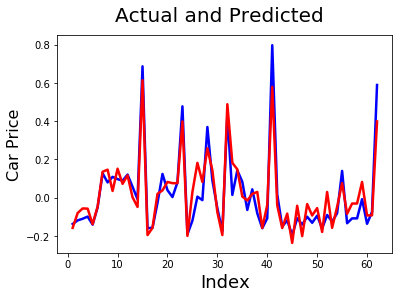

In [162]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

The predicted data almost fits the actual data points. Let see if the error curve is radom in nature or if there is any pattern to it

Text(0,0.5,'ytest-ypred')

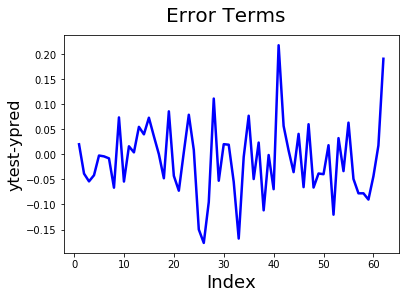

In [163]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

The error terms fluctuates above and below the mean zero.

Text(0,0.5,'y_pred')

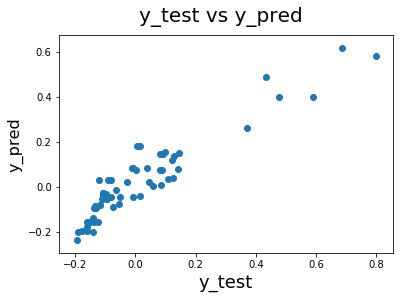

In [164]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

The predicted and actual are linear in nature and the error term spread is minimum

Text(0,0.5,'Index')

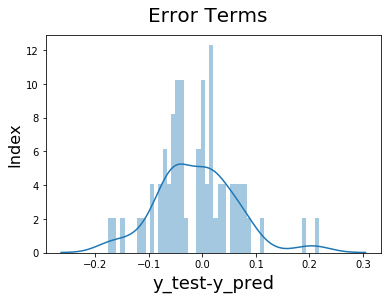

In [165]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

Also the error is guassian in nature and is symmetric around 0

## Analysis

Based on the analysis of various features, error terms, r-square, vif, p-value and root mean squared error metrics the following columns give the best prediction results with low vif and low p-value

##### Feature                                 weight                             p-value
enginesize                 0.9388            0.000       
volume_car                 0.1328            0.002      
engsize_to_power_ratio     0.2565            0.000       
fueltype_GAS              -0.0679            0.002      
CarCompany_BMW             0.1542            0.000       
CarCompany_PORSCHE         0.1950            0.000  


#### Var                                                 Vif
volume_car                      1.86
enginesize                      1.85
3fueltype_GAS                   1.32
engsize_to_power_ratio          1.27
CarCompany_PORSCHE              1.24
CarCompany_BMW                  1.06


All the vif values are less than 1.9 and p values < 0.001. The r-square value is around 0.882

Among these column fueltype_GAS is not as significant as the other features. 

The most significant feature is engsize_to_power_ratio as it controls the milage, car dimenssions, car weights which form the predominant features in the dataset

CarCompany_PORSCHE and CarCompany_BMW cover most of the variations w.r.t price to other features like boreratio, compressionratio, enginelocation, cylindernumber and doornumber.

So these columns cover all the major features which influence car price